Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [2]:
# 1 etapa) Tratamento da variável target
# Importanto as bibliotecas necessárias

# Análise de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Algoritmos de treino
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Métricas
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [3]:
# Conhecendo o tamanho do dataset
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
# Fazendo a divisão do dataset
Xtrain, Xtest, ytrain, ytest = X[:5000], X[:5000], y[:5000], y[:5000]

In [5]:
# Verificando o fatiamento
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((5000, 784), (5000,), (5000, 784), (5000,))

Observação: Para esse estudo foi feita uma divisão para o dataset bem inferior do que a ideia inicial (que era em torno 55000). A razão desta diminuição foi para otimizar o tempo de processamento de alguns comandos.

In [6]:
# Preparando a variável target
ytrain = np.where((ytrain % 2) == 0, 0, 1)
ytest = np.where((ytest % 2) == 0, 0, 1)

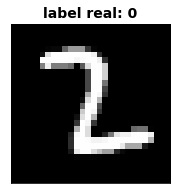

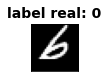

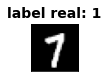

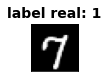

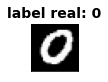

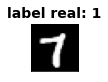

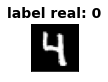

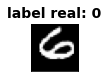

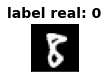

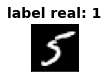

In [7]:
# Aplicando no dataset de traino
# Separando 12 índices aleatórios
random_idx = np.random.randint(0,Xtrain.shape[0], size = 10)

# Imprimindo os índices em uma figura
plt.figure(figsize=[20,20])

# Inserindo em um laço para a impressão dos índices
for i in range(len(random_idx)):
    # Seleção do índice
    idx_i = random_idx[i]
    # Para cada loop filtra a linha, e todas as colunas, associada a esse índice e transforma em uma matriz 28x28
    xval = Xtrain[idx_i, :].reshape(28,28)
    # Digito associado na variável target (é o dígito correto)
    yval = ytrain[idx_i]
    
    # Plota como resultado o dígito, a matriz 28x28
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
    plt.show()

In [8]:
# 3 etapa) Testando diferentes versões do KNN-Classifier, Regressão Logística e Árvore de Decisão
# 3.1) Testando para o KNN
kf = KFold (n_splits=5)

In [9]:
# Instanciando
knn = KNeighborsClassifier()

In [10]:
# Definindo o melhor valor de m para o KNN antes de aplicar a validação cruzada

error_knn = []
for n in range(1,30):
    knn  = KNeighborsClassifier(n_neighbors=n)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_knn.append(np.mean(pred_i != ytest))

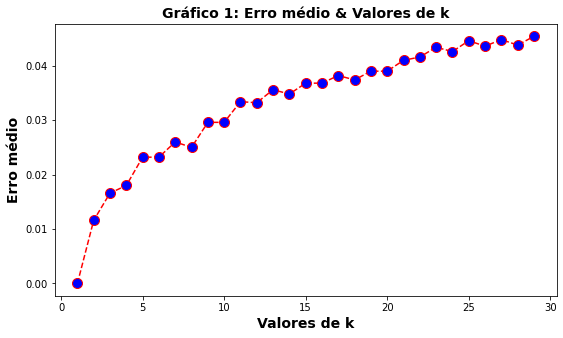

In [11]:
# Visualizando o erro associado aos valores de n_neighbors

# Ajustando o tamanho da figura
plt.figure(figsize=(9,5))  

# Curva
plt.plot(range(1, 30), error_knn, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

# Título do gráfico
plt.title('Gráfico 1: Erro médio & Valores de k', fontsize = 14, fontweight = 'bold')  
   
# legenda dos eixos
plt.xlabel('Valores de k', fontsize = 14, fontweight = 'bold')  
plt.ylabel('Erro médio', fontsize = 14, fontweight = 'bold')

# Apresenta o gráfico
plt.show()

Como pode-se ver no gráfico acima, o valor do erro associado ao k cresce moderadamente a partir do valor de k=20. Por outro lado, para k=1 o erro é baixo, indicando uma possibilidade de overfitting. Aplicando o método da validação cruzada para o mesmo intervalo, poderá ser feito uma escolha do k adequado para aplicação no nosso estudo.

In [12]:
# Definindo o melhor valor de n para o KNN antes de aplicar a validação cruzada

for i in range(1,30,2):
    # Instanciando o KNN com o valor de k correspondente
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    # Fazendo o laço for para aplicar a validação cruzada(explicar melhor isso)
    for train_index, val_index in kf.split(Xtrain, ytrain):
        Xtrain_folds_knn = Xtrain[train_index]
        ytrain_folds_knn = ytrain[train_index]
        Xval_folds_knn = Xtrain[val_index]
        yval_folds_knn = ytrain[val_index]
    
        # Fitando
        KNN.fit(Xtrain_folds_knn, ytrain_folds_knn)
        
        # Fazendo a predição
        pred_treino = KNN.predict(Xtrain_folds_knn)
        pred_validacao = KNN.predict(Xval_folds_knn)
    
        # Calcunado a AUC para o KNN
        AUC_treino = round(roc_auc_score (ytrain_folds_knn, KNN.predict_proba(Xtrain_folds_knn)[:, 1]),4)
        AUC_validacao = round(roc_auc_score (yval_folds_knn, KNN.predict_proba(Xval_folds_knn)[:, 1]),4)
    print(f'k = {i}, AUC_treino = {AUC_treino} e AUC_validação = {AUC_validacao}.')

k = 1, AUC_treino = 1.0 e AUC_validação = 0.9649.
k = 3, AUC_treino = 0.9989 e AUC_validação = 0.9859.
k = 5, AUC_treino = 0.998 e AUC_validação = 0.9897.
k = 7, AUC_treino = 0.9971 e AUC_validação = 0.9899.
k = 9, AUC_treino = 0.9961 e AUC_validação = 0.9902.
k = 11, AUC_treino = 0.9952 e AUC_validação = 0.9901.
k = 13, AUC_treino = 0.9946 e AUC_validação = 0.9892.
k = 15, AUC_treino = 0.9939 e AUC_validação = 0.9896.
k = 17, AUC_treino = 0.9931 e AUC_validação = 0.989.
k = 19, AUC_treino = 0.9925 e AUC_validação = 0.9891.
k = 21, AUC_treino = 0.9918 e AUC_validação = 0.9886.
k = 23, AUC_treino = 0.9913 e AUC_validação = 0.9878.
k = 25, AUC_treino = 0.9907 e AUC_validação = 0.9878.
k = 27, AUC_treino = 0.99 e AUC_validação = 0.9876.
k = 29, AUC_treino = 0.9895 e AUC_validação = 0.9877.


Com a aplicação da validação cruzada, podemos encontrar que para o valor de k=1 a AUC do treino e da validação fica no valor de 1, confirmando a possibilidade de overfitting, conforme visto anteriormente. Contudo para os valores de k=6 até k=21 não há uma variação significativa entre os valores da AUC de treino comparando com o respectivo da AUC da validação. Sendo assim, qualquer valor dentro deste intervalo teria pouca diferença, logo será escolhido o k = 11. 

In [13]:
# Treinando o KNN com o k adequado
KNN  = KNeighborsClassifier(n_neighbors=11) 

In [14]:
# Fazendo o laço for para aplicar a validação cruzada(explicar melhor isso)
for train_index, val_index in kf.split(Xtrain, ytrain):
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_folds = Xtrain[val_index]
    yval_folds = ytrain[val_index]

In [15]:
# Fitando
KNN.fit(Xtrain_folds_knn, ytrain_folds_knn)

KNeighborsClassifier(n_neighbors=11)

In [16]:
# Fazendo a predição
pred_treino = KNN.predict(Xtrain_folds_knn)
pred_validacao = KNN.predict(Xval_folds_knn)

In [17]:
# Calculando a AUC para o KNN
AUC_treino = round(roc_auc_score (ytrain_folds_knn, KNN.predict_proba(Xtrain_folds_knn)[:, 1]),4)
print(f'A AUC para o treino é {AUC_treino}.')
AUC_validacao = round(roc_auc_score (yval_folds_knn, KNN.predict_proba(Xval_folds_knn)[:, 1]),4)
print(f'A AUC para o treino é {AUC_validacao}.')

A AUC para o treino é 0.9952.
A AUC para o treino é 0.9901.


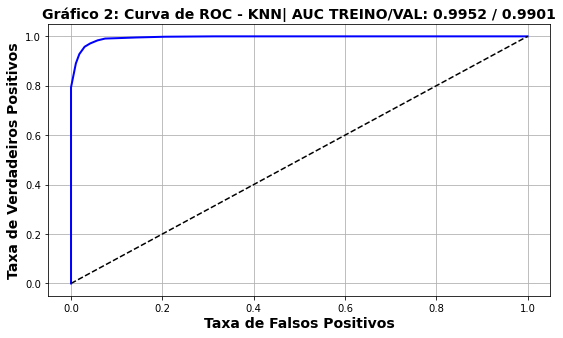

In [18]:
# Plotando curva de ROC para o KNN

# Definindo a função da curva
fpr, tpr, thresholds = roc_curve(ytrain_folds_knn, KNN.predict_proba(Xtrain_folds_knn)[:, 1])

# Ajustando o tamanho da figura
plt.figure(figsize = [9,5])

# Retas
plt.plot(fpr, tpr,c = 'blue', lw = 2, label= 'KNN Classifier')
plt.plot([0,1], [0,1], 'k--')                              
    
# Escala dos eixos
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.2, 0.2))
                                 
# Aparência de grades no gráfico
plt.grid()
    
# legenda dos eixos
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, fontweight = 'bold')
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, fontweight = 'bold')
    
# Título do gráfico
plt.title("Gráfico 2: Curva de ROC - KNN| AUC TREINO/VAL: "+ str(AUC_treino) + " / " + str(AUC_validacao), fontsize = 14, fontweight = 'bold')
    
# Apresentando o gráfico
plt.show()

In [19]:
# 3.2) Testando para Regressão Logística

# Instanciando
LogReg = LogisticRegression()

In [20]:
# Fazendo o laço for para aplicar a validação cruzada (explicar melhor isso)
for train_index, val_index in kf.split(Xtrain, ytrain):
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_folds = Xtrain[val_index]
    yval_folds = ytrain[val_index]

In [21]:
# Treinando
LogReg.fit(Xtrain_folds, ytrain_folds)

LogisticRegression()

In [22]:
# Fazendo a predição
pred_treino = LogReg.predict(Xtrain_folds)
pred_validacao = LogReg.predict(Xval_folds)

In [23]:
# Calculando a AUC para o Regressão Logística
AUC_treino_LogReg = round(roc_auc_score(ytrain_folds, LogReg.predict_proba(Xtrain_folds)[:, 1]), 4)
print(f'A AUC para o treino é {AUC_treino_LogReg}.')
AUC_validacao_LogReg = round(roc_auc_score(yval_folds, LogReg.predict_proba(Xval_folds)[:, 1]), 4)
print(f'A AUC para a validação é {AUC_validacao_LogReg}.')

A AUC para o treino é 0.9827.
A AUC para a validação é 0.941.


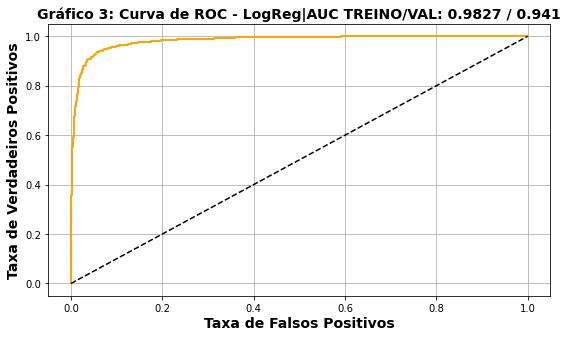

In [24]:
# Plotando curva de ROC para o Logistic Regression

# Definindo a função da curva
fpr_LogReg, tpr_LogReg, thresholds = roc_curve(ytrain_folds, LogReg.predict_proba(Xtrain_folds)[:, 1])

#Ajustando o tamanho da figura
plt.figure(figsize = [9,5])

# Retas
plt.plot(fpr_LogReg, tpr_LogReg,c = 'orange', lw = 2, label= 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
    
# Escala dos eixos
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.2, 0.2))
                                 
# Aparência de grades no gráfico
plt.grid()
    
# legenda dos eixos
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, fontweight = 'bold')
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, fontweight = 'bold')
    
# Título do gráfico
plt.title("Gráfico 3: Curva de ROC - LogReg|AUC TREINO/VAL: " + str(AUC_treino_LogReg) + " / " + str(AUC_validacao_LogReg), fontsize = 14, fontweight = 'bold')
    
# Apresentando o gráfico
plt.show()

In [25]:
# 3.3) Testando para Árvore de Decisão

# Instanciando
DecTree = DecisionTreeClassifier()

In [26]:
# Definindo o melhor valor do nó para o modelo de Árvore de Decisão antes de aplicar a validação cruzada

error_DecTree = []
for m in range(1,30):
    DecTree = DecisionTreeClassifier(max_depth=m)
    DecTree.fit(Xtrain, ytrain)
    pred_i = DecTree.predict(Xtest)
    error_DecTree.append(np.mean(pred_i != ytest))

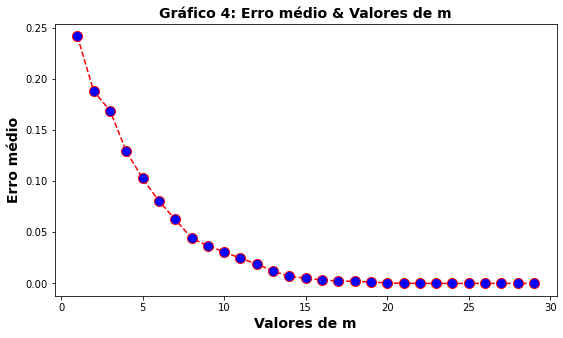

In [27]:
# Visualizando o erro associado aos valores de m

# Ajustando o tamanho da figura
plt.figure(figsize=(9, 5))  

# Curva
plt.plot(range(1, 30), error_DecTree, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

# Título do gráfico
plt.title('Gráfico 4: Erro médio & Valores de m', fontsize = 14, fontweight = 'bold')  
   
# legenda dos eixos
plt.xlabel('Valores de m', fontsize = 14, fontweight = 'bold')  
plt.ylabel('Erro médio', fontsize = 14, fontweight = 'bold')

# Apresenta o gráfico
plt.show()

A partir do gráfico 4 pode-se observar que para valores com o nó da árvore próximo de 20 o erro fica significativamente próximos a zero. Aplicando a validação cruzada para a verificação dos valores de AUC para a mesma faixa de valores, poderemos ter melhores conclusões.

In [28]:
# Definindo o melhor valor de m para a Árvore de Decisão antes de aplicar a validação cruzada

for i in range(1,30,2):
    # Instanciando o KNN com o valor de k correspondente
    DecTree = DecisionTreeClassifier(max_depth=i)
    
    # Fazendo o laço for para aplicar a validação cruzada(explicar melhor isso)
    for train_index, val_index in kf.split(Xtrain, ytrain):
        Xtrain_folds_dt = Xtrain[train_index]
        ytrain_folds_dt = ytrain[train_index]
        Xval_folds_dt = Xtrain[val_index]
        yval_folds_dt = ytrain[val_index]
    
        # Fitando
        DecTree.fit(Xtrain_folds_dt, ytrain_folds_dt)
        
        # Fazendo a predição
        pred_treino = DecTree.predict(Xtrain_folds_dt)
        pred_validacao = DecTree.predict(Xval_folds_dt)
    
        # Calcunado a AUC para o KNN
        AUC_treino_DecTree = round(roc_auc_score (ytrain_folds_dt, DecTree.predict_proba(Xtrain_folds_dt)[:, 1]),4)
        AUC_validacao_DecTree = round(roc_auc_score (yval_folds_dt, DecTree.predict_proba(Xval_folds_dt)[:, 1]),4)
    print(f'max_depth = {i}, AUC_treino = {AUC_treino_DecTree} e AUC_validação = {AUC_validacao_DecTree}.')

max_depth = 1, AUC_treino = 0.7572 e AUC_validação = 0.753.
max_depth = 3, AUC_treino = 0.8741 e AUC_validação = 0.8437.
max_depth = 5, AUC_treino = 0.946 e AUC_validação = 0.8933.
max_depth = 7, AUC_treino = 0.9705 e AUC_validação = 0.8879.
max_depth = 9, AUC_treino = 0.9875 e AUC_validação = 0.8787.
max_depth = 11, AUC_treino = 0.9936 e AUC_validação = 0.8373.
max_depth = 13, AUC_treino = 0.9966 e AUC_validação = 0.8256.
max_depth = 15, AUC_treino = 0.9975 e AUC_validação = 0.8389.
max_depth = 17, AUC_treino = 0.999 e AUC_validação = 0.833.
max_depth = 19, AUC_treino = 0.9995 e AUC_validação = 0.8574.
max_depth = 21, AUC_treino = 1.0 e AUC_validação = 0.8786.
max_depth = 23, AUC_treino = 1.0 e AUC_validação = 0.8681.
max_depth = 25, AUC_treino = 1.0 e AUC_validação = 0.8663.
max_depth = 27, AUC_treino = 1.0 e AUC_validação = 0.8729.
max_depth = 29, AUC_treino = 1.0 e AUC_validação = 0.8773.


Assim temos a confirmação de que para valores onde o nó está acima de 20 há overfitting. Contudo, para valores pequenos o erro costuma ser maior. Assim, avaliando as opções o valor onde há menor variação entre a AUC de treino e validação é para max_depth = 16.

In [29]:
# Treinando a Árvore de Decisão com o m adequado
DecTree = DecisionTreeClassifier(max_depth=11) 

In [30]:
# Fazendo o laço for para aplicar a validação cruzada (explicar melhor isso)
for train_index, val_index in kf.split(Xtrain, ytrain):
    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_folds = Xtrain[val_index]
    yval_folds = ytrain[val_index]

In [31]:
# Treinando
DecTree.fit(Xtrain_folds, ytrain_folds)

DecisionTreeClassifier(max_depth=11)

In [32]:
# Fazendo a predição
pred_treino = DecTree.predict(Xtrain_folds)
pred_validacao = DecTree.predict(Xval_folds)

In [33]:
# Calcunado a AUC para Árvore de Decisão
AUC_treino_DecTree= round(roc_auc_score(ytrain_folds_dt, DecTree.predict_proba(Xtrain_folds_dt)[:, 1]), 4)
print(f'A AUC para o treino é {AUC_treino_DecTree}.')
AUC_validacao_DecTree = round(roc_auc_score(yval_folds_dt, DecTree.predict_proba(Xval_folds_dt)[:, 1]), 4)
print(f'A AUC para a validação é {AUC_validacao_DecTree}.')

A AUC para o treino é 0.9936.
A AUC para a validação é 0.8485.


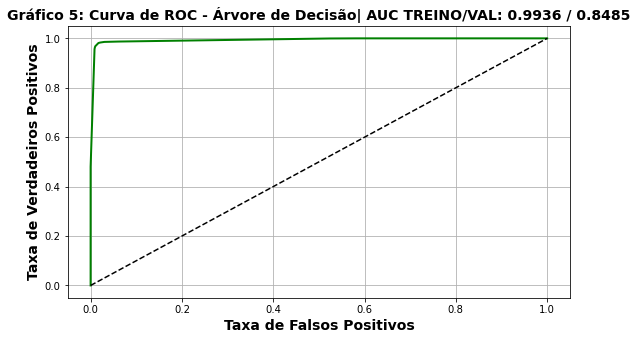

In [34]:
# Plotando curva de ROC para o Árvore de Decisão

# Definindo a função da curva
fpr_DecTree, tpr_DecTree, thresholds = roc_curve(ytrain_folds_dt, DecTree.predict_proba(Xtrain_folds_dt)[:, 1])

# Ajustando o tamanho da figura
plt.figure(figsize = [9,5])

# Retas
plt.plot(fpr_DecTree, tpr_DecTree, c = 'green', lw = 2, label= 'Decision Tree')
plt.plot([0,1], [0,1], 'k--')
    
# Escala dos eixos
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.2, 0.2))
                                 
# Aparência de grades no gráfico
plt.grid()
    
# legenda dos eixos
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, fontweight = 'bold')
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, fontweight = 'bold')
    
# Título do gráfico
plt.title("Gráfico 5: Curva de ROC - Árvore de Decisão| AUC TREINO/VAL: "+ str(AUC_treino_DecTree) + " / " + str(AUC_validacao_DecTree), fontsize = 14, fontweight = 'bold')
    
# Apresentando o gráfico
plt.show()

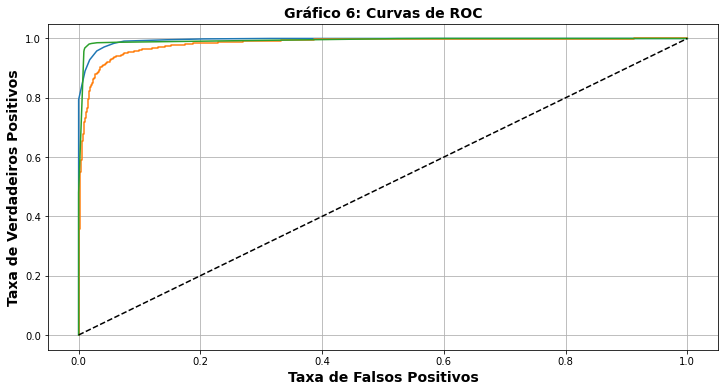

In [35]:
# Plotando as curvas de ROC para todos os modelos

# Ajustando o tamanho da figura
plt.figure(figsize = [12,6])

# Retas
plt.plot(fpr, tpr, label = 'KNN Classifier')
plt.plot(fpr_LogReg, tpr_LogReg, label= 'Logistic Regression')
plt.plot(fpr_DecTree, tpr_DecTree, label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--')
    
# Escala dos eixos
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.2, 0.2))
                                 
# Aparência de grades no gráfico
plt.grid()
    
# legenda dos eixos
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, fontweight = 'bold')
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, fontweight = 'bold')
    
# Título do gráfico
plt.title("Gráfico 6: Curvas de ROC", fontsize = 14, fontweight = 'bold')
    
# Apresentando o gráfico
plt.show()

In [36]:
# 4 etapa) Fazendo o teste

# Treinando
modelo_final = KNeighborsClassifier(n_neighbors=11)
modelo_final.fit(Xtrain, ytrain)
y_pred = modelo_final.predict(Xtest)
y_prob = modelo_final.predict_proba(Xtest)

# Imprimindo o AUC
AUC_teste = roc_auc_score (modelo_final.predict(Xtest), modelo_final.predict_proba(Xtest)[:, 1])
print(f'A AUC para o teste é {AUC_teste}.')

# Imprimindo relatório de classificação
print("Relatório de Classificação: \n", classification_report(ytest, y_pred, digits = 4))


A AUC para o teste é 1.0.
Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9840    0.9477    0.9655      2465
           1     0.9509    0.9850    0.9676      2535

    accuracy                         0.9666      5000
   macro avg     0.9674    0.9663    0.9666      5000
weighted avg     0.9672    0.9666    0.9666      5000



Visualizando o gráfico 6 aparentemente a curva para o modelo de Árvore de Decisão é a que apresenta a maior área, contudo o desempenho do treino não acompanhou muito bem na validação, os resultados ficaram bons apenas no treino, ou seja, não houve uma boa generalização. Assim o melhor modelo para o estudo aqui seria a aplicação do KNN. Utilizando este modelo foi obtido um AUC igual a 1, o que está dentro do esperado. Além disso, uma outra forma de verificar se o modelo está performando bem é atráves do Relatório de Classificação. Nele a confirmação disso, pois as métricas como precisão e acurária também estão significativamente altas.